# Importing libraries


In [35]:
library(tidyverse)
library(ggplot2)
library(dbplyr)
library(boot)
library(caTools)
library(dplyr)
library (caret)
library (data.table)


# Importing dataset

In [2]:
travelInsurance <- read.csv(file = 'travel.csv')

In [3]:
head(travelInsurance)

X,Age,Employment.Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0


# Exploration and Summary of data

In [4]:
summary(travelInsurance)

       X               Age                            Employment.Type
 Min.   :   0.0   Min.   :25.00   Government Sector           : 570  
 1st Qu.: 496.5   1st Qu.:28.00   Private Sector/Self Employed:1417  
 Median : 993.0   Median :29.00                                      
 Mean   : 993.0   Mean   :29.65                                      
 3rd Qu.:1489.5   3rd Qu.:32.00                                      
 Max.   :1986.0   Max.   :35.00                                      
 GraduateOrNot  AnnualIncome     FamilyMembers   ChronicDiseases  FrequentFlyer
 No : 295      Min.   : 300000   Min.   :2.000   Min.   :0.0000   No :1570     
 Yes:1692      1st Qu.: 600000   1st Qu.:4.000   1st Qu.:0.0000   Yes: 417     
               Median : 900000   Median :5.000   Median :0.0000                
               Mean   : 932763   Mean   :4.753   Mean   :0.2778                
               3rd Qu.:1250000   3rd Qu.:6.000   3rd Qu.:1.0000                
               Max.   :1800000

In [5]:
head(travelInsurance, 10)

X,Age,Employment.Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
9,33,Government Sector,Yes,800000,3,0,Yes,No,0


In [6]:
str(travelInsurance)

'data.frame':	1987 obs. of  10 variables:
 $ X                  : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Age                : int  31 31 34 28 28 25 31 31 28 33 ...
 $ Employment.Type    : Factor w/ 2 levels "Government Sector",..: 1 2 2 2 2 2 1 2 2 1 ...
 $ GraduateOrNot      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 2 2 ...
 $ AnnualIncome       : int  400000 1250000 500000 700000 700000 1150000 1300000 1350000 1450000 800000 ...
 $ FamilyMembers      : int  6 7 4 3 8 4 4 3 6 3 ...
 $ ChronicDiseases    : int  1 0 1 1 1 0 0 0 1 0 ...
 $ FrequentFlyer      : Factor w/ 2 levels "No","Yes": 1 1 1 1 2 1 1 2 2 2 ...
 $ EverTravelledAbroad: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 2 2 1 ...
 $ TravelInsurance    : int  0 0 1 0 0 0 0 1 1 0 ...


In [7]:
travelInsurance %>% count(TravelInsurance)

TravelInsurance,n
0,1277
1,710


Here i have shown the number of travel insurance 

# Checking null values

### Checking to see if there is any nulls in each column

In [8]:
colSums(is.na(travelInsurance))

X                 Age     Employment.Type       GraduateOrNot 
                  0                   0                   0                   0 
       AnnualIncome       FamilyMembers     ChronicDiseases       FrequentFlyer 
                  0                   0                   0                   0 
EverTravelledAbroad     TravelInsurance 
                  0                   0

There is no null values in here 

# Data Exploration and Visualization

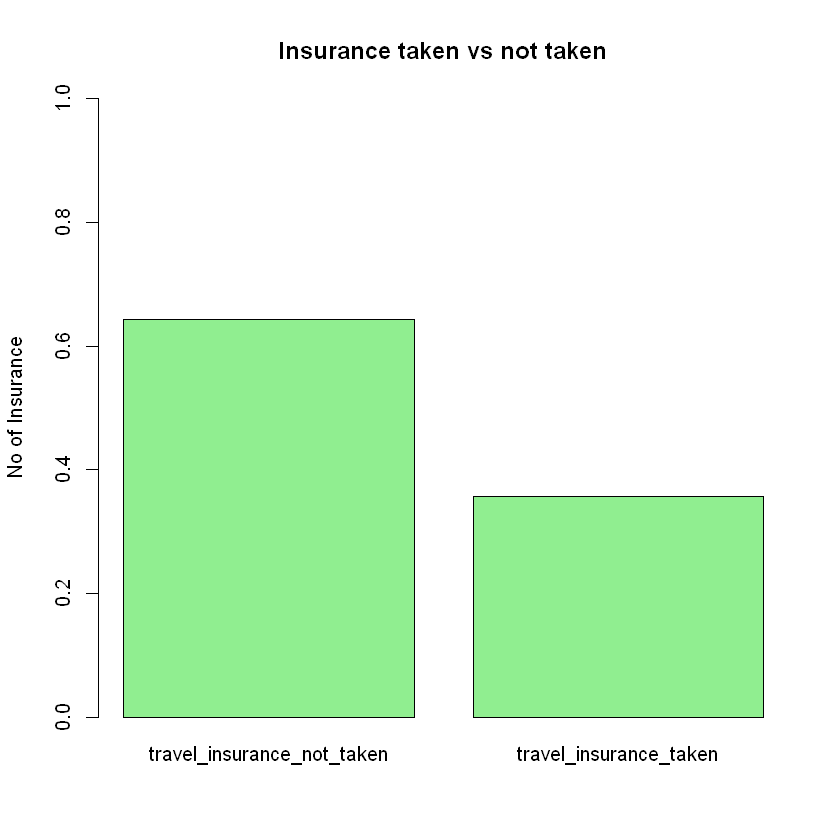

In [9]:
barplot(prop.table(table(travelInsurance$TravelInsurance
)),
        names.arg = c('travel_insurance_not_taken', 'travel_insurance_taken'),
        ylab = 'No of Insurance', main="Insurance taken vs not taken", col='light green', ylim = c(0,1.0))

### Here i have given the barplot of insurance taken and insurance not taken

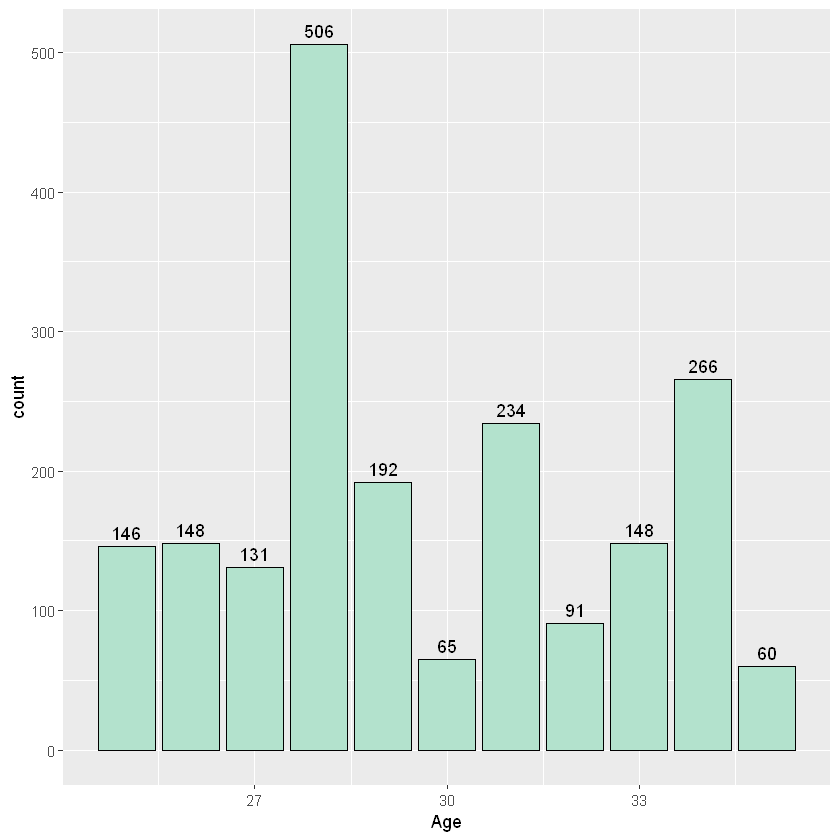

In [10]:
p1 <- ggplot(data=travelInsurance) +
  geom_bar(mapping = aes(x = Age), fill = '#B3E2CD', color = 'black') +
  geom_text(mapping = aes(x = Age, label = ..count..),stat = 'count', vjust=-0.50)
p1

### Here I have shown the showcase of the age

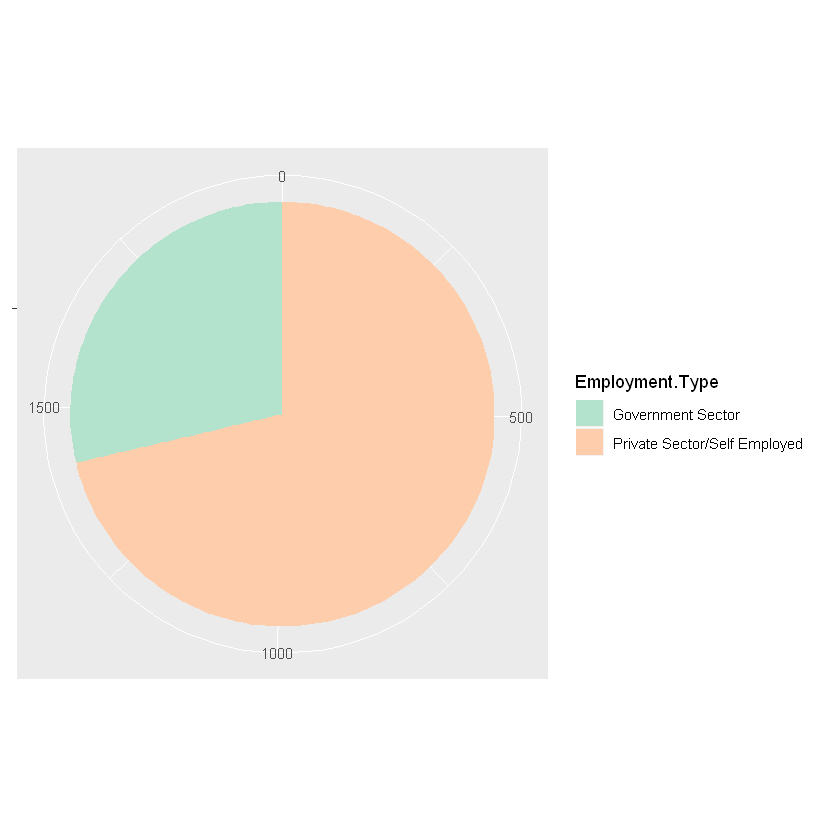

In [11]:
p2 <- ggplot(data=travelInsurance) +
  geom_bar(mapping = aes(x = "", fill = Employment.Type), width = 0.5) +
  labs(x = NULL, y = NULL)
p2 <- p2 + coord_polar(theta = "y") +
  theme(aspect.ratio = 1:1) +
  scale_fill_brewer(palette = "Pastel2")
p2

### Here I have shown the employment type

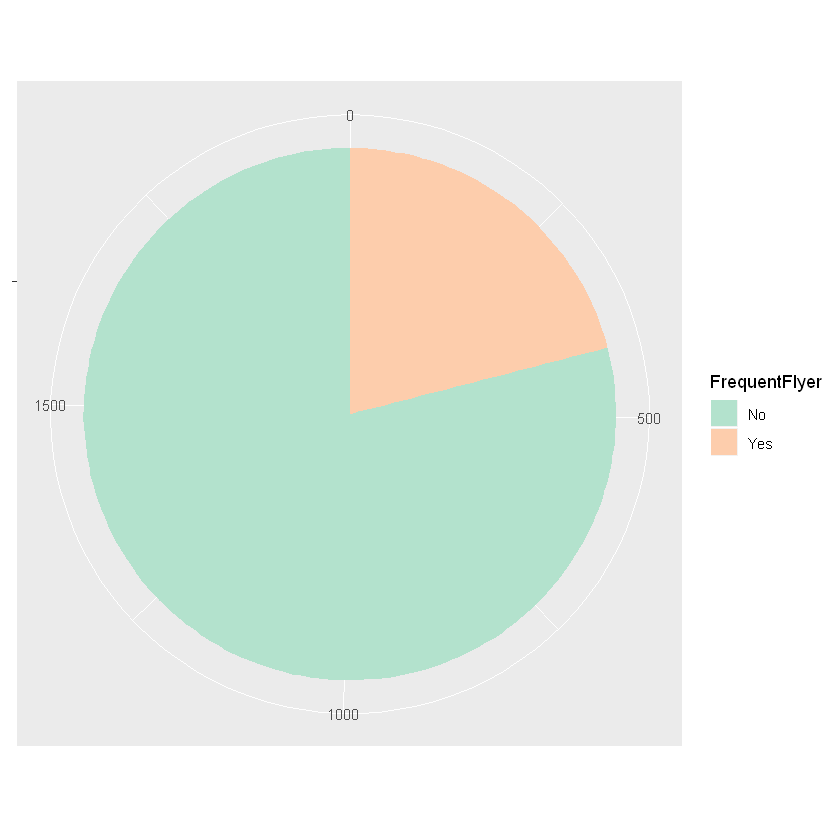

In [12]:
p3 <- ggplot(data=travelInsurance) +
  geom_bar(mapping = aes(x = "", fill = FrequentFlyer), width = 0.5) +
  labs(x = NULL, y = NULL)
p3 <- p3 + coord_polar(theta = "y") +
  theme(aspect.ratio = 1:1) +
  scale_fill_brewer(palette = "Pastel2")
p3

### In here i have shown who are the frequent flyer and who are not

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


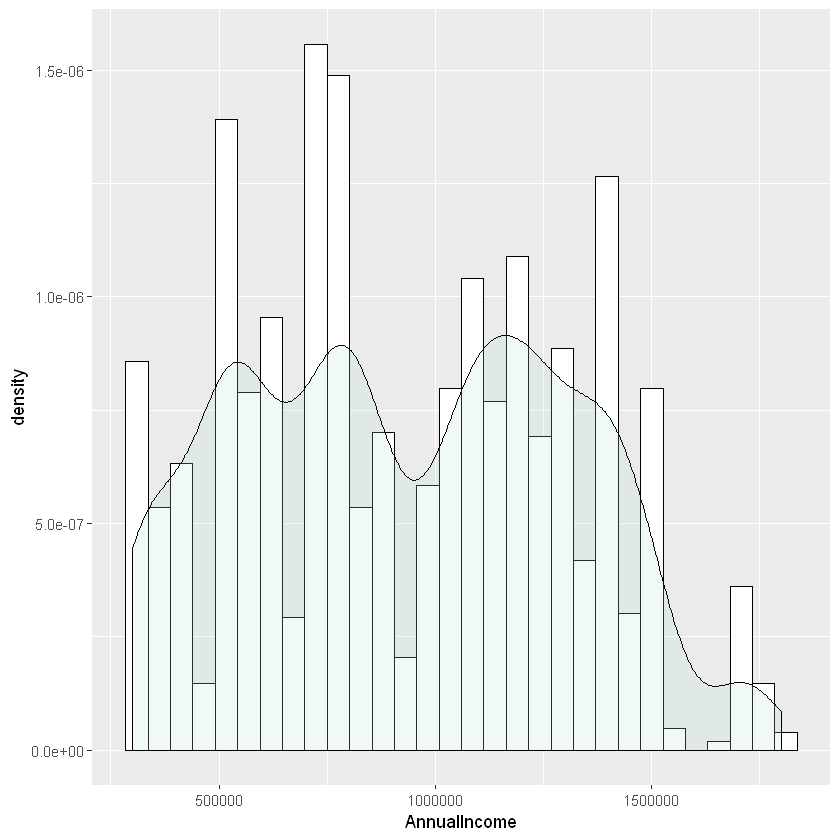

In [13]:
p4 <- ggplot(data=travelInsurance, mapping = aes(x = AnnualIncome)) +
  geom_histogram(mapping = aes(y=..density..), colour = "black", fill = "white")+
  geom_density(alpha = 0.2, fill = "#B3E2CD")
p4


### Here i have shown the showcases of annual income 

# Data Cleansing

In [40]:
newdf <- travelInsurance %>% select (-c(Employment.Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad)) 

In [46]:
newdf$TravelInsurance <- as.factor(travelInsurance$TravelInsurance)
levels(newdf$TravelInsurance) <- c('travel_insurance_not_taken', 'travel_insurance_taken')

# Training and testing the data

In [47]:
set.seed(101)
split <- sample.split(newdf$TravelInsurance, SplitRatio = 0.8)
train_data <- subset(newdf, split == TRUE)
test_data <- subset(newdf, split == FALSE)
dim(train_data)

[1] 1590    6

In [48]:
dim(test_data)

[1] 397   6

In [50]:
LogModel = glm(TravelInsurance~., test_data, family=binomial())

In [51]:
library(pROC)

Setting levels: control = travel_insurance_not_taken, case = travel_insurance_taken
Setting direction: controls < cases



Call:
roc.default(response = test_data$TravelInsurance, predictor = LM_roc,     plot = TRUE, col = "green")

Data: LM_roc in 255 controls (test_data$TravelInsurance travel_insurance_not_taken) < 142 cases (test_data$TravelInsurance travel_insurance_taken).
Area under the curve: 0.7469

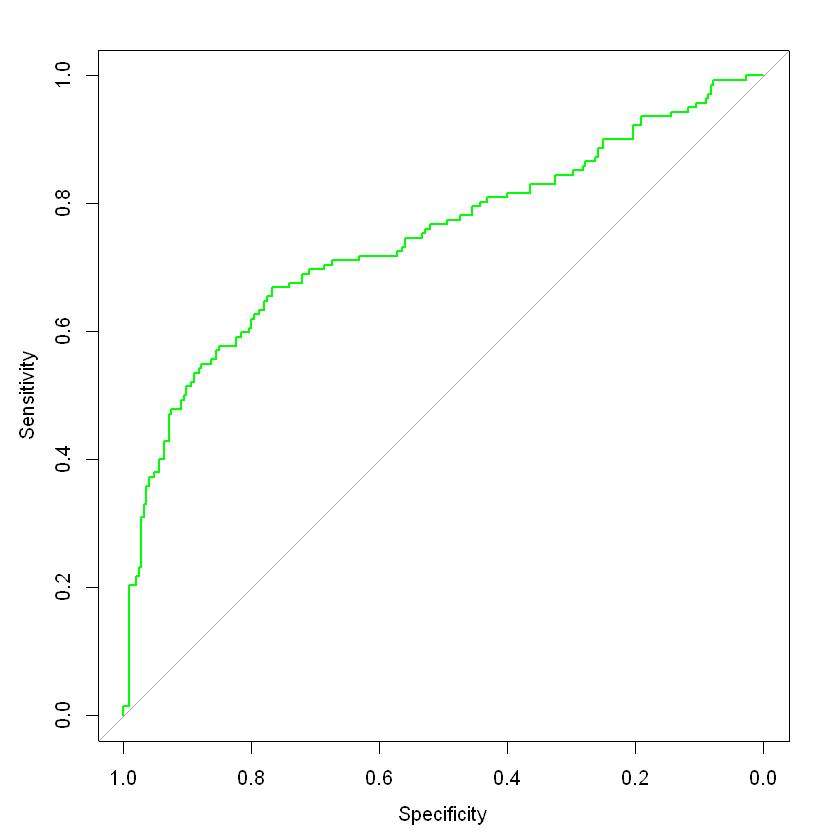

In [85]:
LM_roc = predict(LogModel,test_data, type='response')
roc(test_data$TravelInsurance, LM_roc, plot=TRUE, col="green")

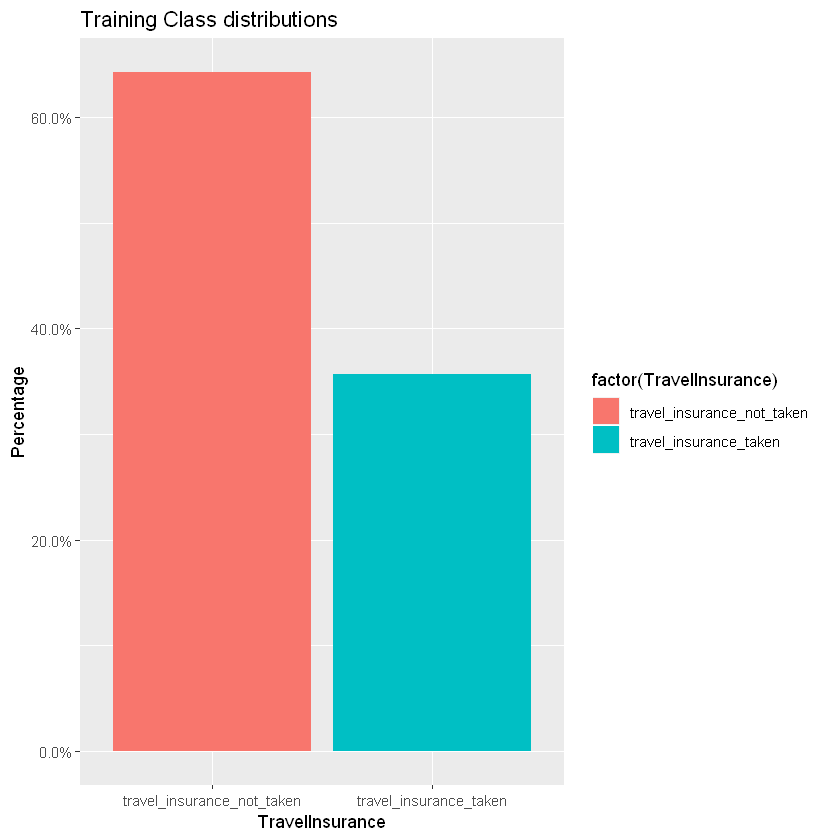

In [53]:
train_data %>% ggplot(aes(x = factor(TravelInsurance), y = prop.table(stat(count)), fill = factor(TravelInsurance))) +
  geom_bar(position = "dodge") +
  scale_y_continuous(labels = scales::percent) +
  labs(x = 'TravelInsurance', y = 'Percentage', title = 'Training Class distributions') +
  theme_grey()

# Logistic regression

In [54]:
logistic_model <- glm(TravelInsurance ~ ., train_data, family='binomial')

In [55]:
summary(logistic_model)


Call:
glm(formula = TravelInsurance ~ ., family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9645  -0.8892  -0.5405   0.9803   2.3280  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -5.711e+00  6.579e-01  -8.680  < 2e-16 ***
X                4.683e-05  1.014e-04   0.462  0.64415    
Age              5.894e-02  1.936e-02   3.045  0.00233 ** 
AnnualIncome     2.564e-06  1.702e-07  15.066  < 2e-16 ***
FamilyMembers    1.604e-01  3.612e-02   4.440 8.98e-06 ***
ChronicDiseases  2.126e-01  1.278e-01   1.663  0.09625 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2072.8  on 1589  degrees of freedom
Residual deviance: 1772.0  on 1584  degrees of freedom
AIC: 1784

Number of Fisher Scoring iterations: 4


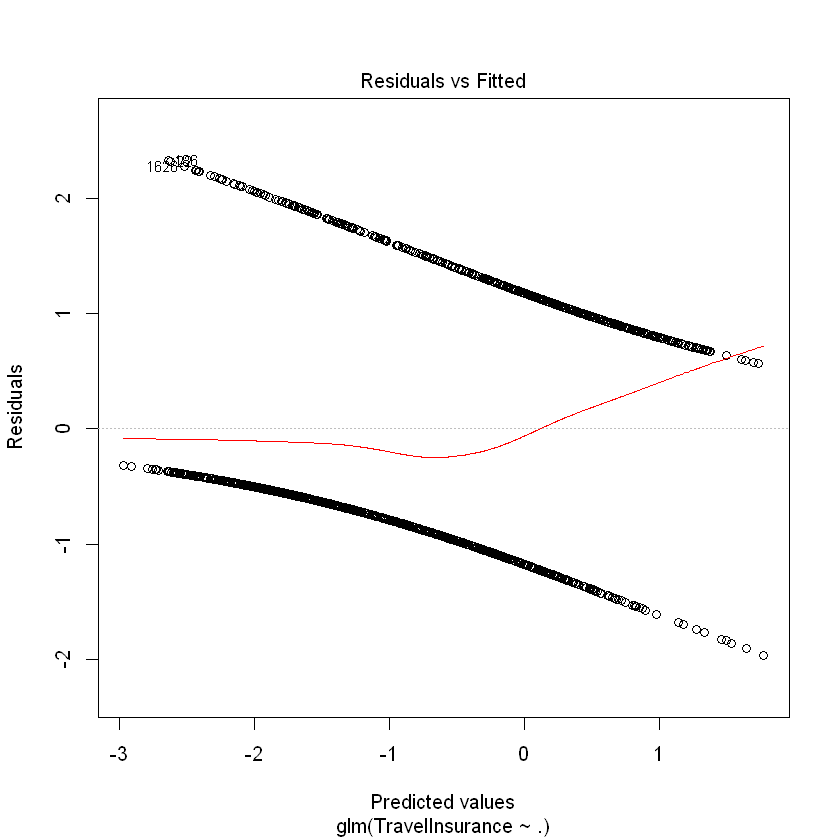

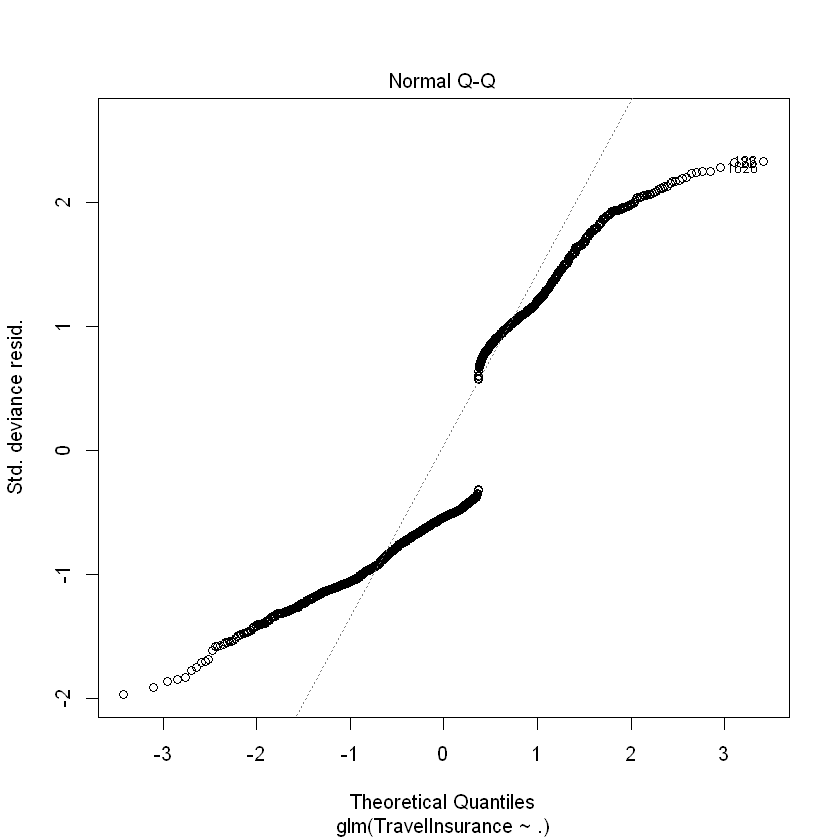

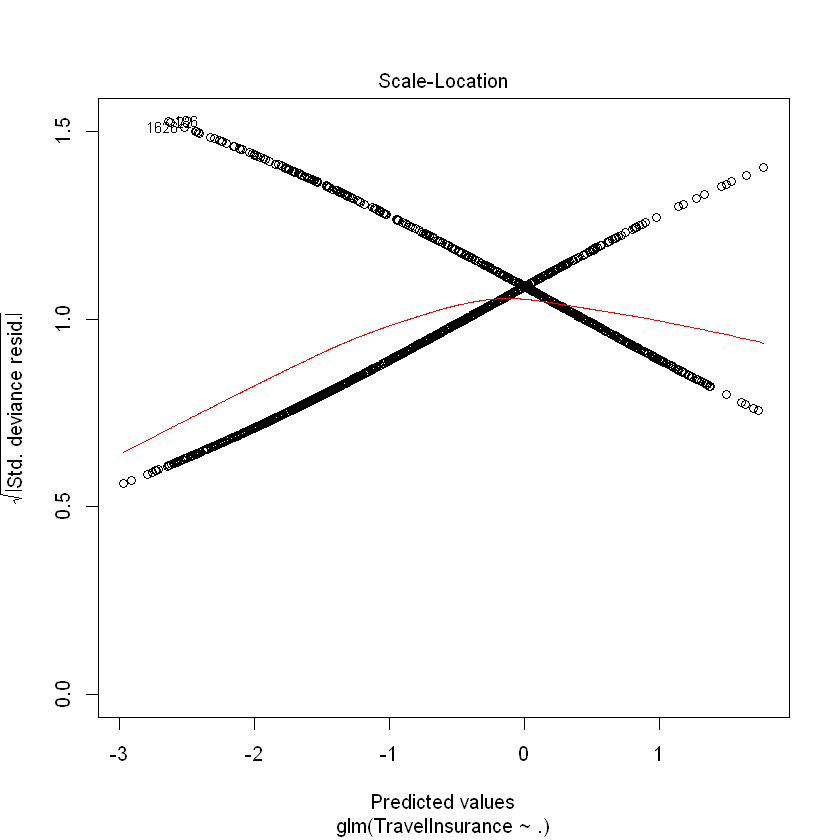

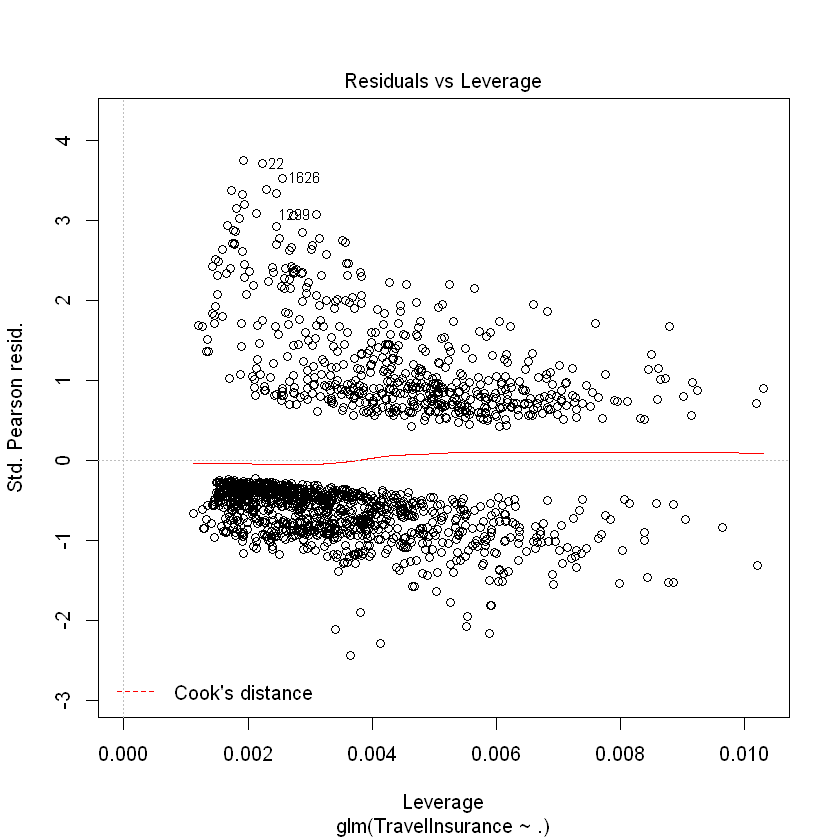

In [56]:
plot(logistic_model)

# Confusion Matrix

In [73]:
logit.fit <- glm(TravelInsurance ~ ., family = binomial(), data = newdf)

In [74]:
logit.fit.prob <- predict(logit.fit, type = 'response')

In [75]:
logit.fit.class <- ifelse(logit.fit.prob > 0.5, "1", "0") %>% as.factor()

In [76]:
mean(travelInsurance$TravelInsurance != logit.fit.class)

[1] 0.2506291

In [77]:
cost <- function(r, pi = 0) mean(abs(r-pi) > 0.5)

In [78]:
cv.glm(travelInsurance, logit.fit, cost=cost, K=10)$delta[1]

[1] 0.2315048

In [83]:
confusion.matrix <- table(travelInsurance$TravelInsurance, logit.fit.class)
confusion.matrix

   logit.fit.class
       0    1
  0 1117  160
  1  338  372

In [80]:
tp <- confusion.matrix[2,2]
fn <- confusion.matrix[2,1]
sensitivity <- tp/(tp+fn)
sensitivity

[1] 0.5239437

In [81]:
tn <- confusion.matrix[1,1]
fp <- confusion.matrix[1,2]
specificity <- tn/(tn+fp)
specificity

[1] 0.8747063